In [1]:
import pandas as pd

In [3]:
df_contemp = pd.read_csv('data/df_contemp.csv')
df_contemp

,title,author,fmc_name,year,author_gender,master_genre,Q4.answer,Q4.explanation,Q5.answer,Q5.explanation,...,Q26.explanation,Q27.answer,Q27.explanation,Q28.answer,Q28.explanation,Q29.answer,Q29.explanation,prop_pos,prop_neg,diff_prop
0,Wildflower Hill,"Freeman, Kimberley",Beattie Blaxland,2010,1,Historical Fiction,0.0,There is no indication that Beattie is saved b...,0.0,There is no mention of Beattie saving a male c...,...,There is no mention of Beattie being admired s...,1.0,Beattie is admired for her intelligence and re...,0.0,Beattie does not have a lower rank occupation;...,1.0,Beattie has a higher rank occupation as a farm...,0.307692,0.615385,-0.307692
1,Oracle Night,"Auster, Paul",Grace,2003,0,Literary Fiction,0.0,No evidence of Grace being saved by a male cha...,0.0,Grace does not save any male character.,...,"Resemblance to Siri Hustvedt noted[1], but no ...",NaN,"Professional role implies competence, but inte...",0.0,Art director role is mid/high-ranking[7].,1.0,Holds a managerial position in publishing[7].,0.333333,0.375000,-0.041667
2,Eleanor Rigby,"Coupland, Douglas",Liz Dunn,2004,0,Literary Fiction,0.0,Jeremy's arrival disrupts Liz's isolation but ...,1.0,Liz becomes Jeremy's primary caregiver during ...,...,Described as 'plain' and self-conscious about ...,NaN,Intelligence isn't discussed as a trait.,NaN,Specific occupation rank unclear.,NaN,No managerial/professional role described.,0.416667,0.444444,-0.027778
3,Journal 64 Department Q 4,"Adler-Olsen, Jussi",Nete Rosen,2010,0,Mystery,0.0,There is no indication that Nete Rosen is save...,0.0,There is no indication that Nete Rosen saves a...,...,There is no indication that Nete Rosen is admi...,0.0,There is no indication that Nete Rosen is admi...,0.0,There is no indication that Nete Rosen has a l...,0.0,There is no indication that Nete Rosen has a h...,0.076923,0.461538,-0.384615
4,The Revealers,"Wilhelm, Doug",Catalina,2003,0,YA,0.0,Catalina collaborates with male peers but isn'...,0.0,No instances of physically saving male characters,...,Physical appearance not emphasized,1.0,Admired for writing skills and resilience,0.0,Student without occupational hierarchy,0.0,Student without occupational hierarchy,0.300000,0.454545,-0.154545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12951,The Woman He Loved Before,"Koomson, Dorothy",Libby Britcham,2013,1,Romance,0.0,There is no indication that Libby is saved by ...,0.0,There is no information suggesting Libby saves...,...,There is no information about Libby being admi...,NaN,There is no information about Libby being admi...,NaN,There is no information about Libby having a l...,NaN,There is no information about Libby having a h...,0.500000,0.444444,0.055556
12952,Earthquake Terror Puffin Novel,"Kehret, Peg",Abby,1996,1,Other,1.0,Abby is rescued after Jonathan provides direct...,0.0,There is no indication that Abby saves a male ...,...,There is no mention of Abby being admired for ...,0.0,There is no mention of Abby being admired for ...,0.0,There is no indication that Abby holds a lower...,0.0,There is no indication that Abby holds a highe...,0.454545,0.384615,0.069930
12953,Truly Madly Deeply,"Kazi, Faraaz",Seema,2010,0,Romance,0.0,There is no indication that Seema is saved by ...,0.0,There is no mention of Seema saving a male cha...,...,Seema is admired for her beauty.,1.0,Seema is also admired for her intelligence.,0.0,Seema does not have a lower rank occupation.,0.0,Seema does not have a higher rank occupation.,0.125000,0.250000,-0.125000
12954,The American Heiress,"Goodwin, Daisy",Cora Cash,2010,1,Historical Fiction,1.0,Cora is saved by the Duke of Wareham after she...,0.0,There is no indication that Cora saves a male ...,...,Cora is admired for her beauty.,0.0,Cora is not particularly noted for her intelli...,0.0,Cora does not have a lower rank occupation.,0.0,Cora does not have a higher rank occupation in...,0.846154,0.076923,0.769231


In [4]:
items = ['Q4.answer', 'Q5.answer', 'Q6.answer', 'Q7.answer', 'Q8.answer', 'Q9.answer',
        'Q10.answer', 'Q11.answer', 'Q12.answer', 'Q13.answer', 'Q14.answer', 'Q15.answer',
        'Q16.answer', 'Q17.answer', 'Q18.answer', 'Q19.answer', 'Q20.answer', 'Q21.answer',
        'Q22.answer', 'Q23.answer', 'Q24.answer', 'Q25.answer', 'Q26.answer', 'Q27.answer',
        'Q28.answer', 'Q29.answer']

In [ ]:
import statsmodels.formula.api as smf

results = {}

for item in items:
    formula = f'{item} ~ C(author_gender) * C(master_genre)'
    model = smf.ols(formula, data=df_contemp).fit()
    results[item] = model

# Beispiel: Zusammenfassung vom Modell für Q4.answer anzeigen
print(results['Q4.answer'].summary())


In [ ]:
# Alle Spaltennamen mit Punkt durch Unterstrich ersetzen
df_contemp.rename(columns=lambda x: x.replace('.', '_'), inplace=True)
df_contemp

In [9]:
import pandas as pd
import statsmodels.formula.api as smf

items = ['Q4_answer', 'Q5_answer', 'Q6_answer', 'Q7_answer', 'Q8_answer', 'Q9_answer',
         'Q10_answer', 'Q11_answer', 'Q12_answer', 'Q13_answer', 'Q14_answer', 'Q15_answer',
         'Q16_answer', 'Q17_answer', 'Q18_answer', 'Q19_answer', 'Q20_answer', 'Q21_answer',
         'Q22_answer', 'Q23_answer', 'Q24_answer', 'Q25_answer', 'Q26_answer', 'Q27_answer',
         'Q28_answer', 'Q29_answer']

results = {}
summary_list = []

for item in items:
    formula = f'{item} ~ C(author_gender) * C(master_genre)'
    model = smf.ols(formula, data=df_contemp).fit()
    results[item] = model
    
    pvals = model.pvalues
    
    gender_significant = any([term.startswith('C(author_gender)') and pvals[term] < 0.05 
                              for term in pvals.index if ':' not in term])
    
    genre_significant = any([term.startswith('C(master_genre)') and ':' not in term and pvals[term] < 0.05
                             for term in pvals.index])
    
    interaction_significant = any([':' in term and ('C(author_gender)' in term and 'C(master_genre)' in term) and pvals[term] < 0.05
                                  for term in pvals.index])
    
    summary_list.append({
        'Item': item,
        'Gender_significant': gender_significant,
        'Genre_significant': genre_significant,
        'Interaction_significant': interaction_significant
    })

summary_df = pd.DataFrame(summary_list)

print(summary_df)

          Item  Gender_significant  Genre_significant  Interaction_significant
0    Q4_answer               False               True                     True
1    Q5_answer                True               True                     True
2    Q6_answer               False               True                     True
3    Q7_answer                True               True                     True
4    Q8_answer                True               True                     True
5    Q9_answer                True               True                    False
6   Q10_answer               False               True                     True
7   Q11_answer               False               True                    False
8   Q12_answer               False              False                    False
9   Q13_answer               False               True                     True
10  Q14_answer               False              False                     True
11  Q15_answer               False               Tru

In [ ]:
# Sanity Check
model = smf.ols('Q5_answer ~ C(author_gender) * C(master_genre)', data=df_contemp).fit()

from statsmodels.stats.anova import anova_lm

anova_model = anova_lm(model, typ=3)
print(anova_model)

# Plots

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# für jede Frage einen Gender*Genre Plot und einen Signifikanztest?

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1894583916.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='author_gender', y=item, data=data_plot, palette='pastel', ci=95)
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1894583916.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='author_gender', y=item, data=data_plot, palette='pastel', ci=95)


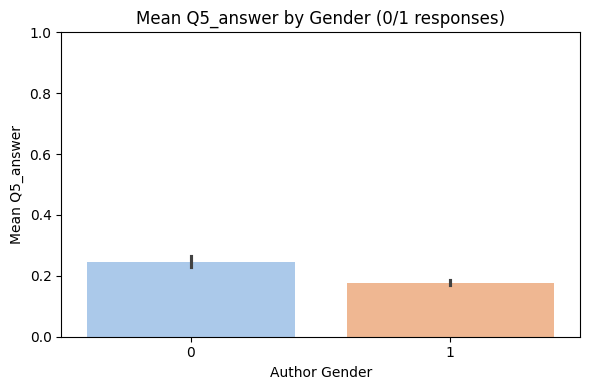

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1894583916.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='author_gender', y=item, data=data_plot, palette='pastel', ci=95)
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1894583916.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='author_gender', y=item, data=data_plot, palette='pastel', ci=95)


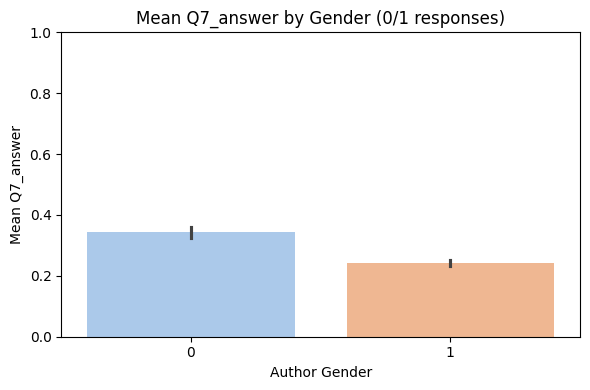

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1894583916.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='author_gender', y=item, data=data_plot, palette='pastel', ci=95)
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1894583916.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='author_gender', y=item, data=data_plot, palette='pastel', ci=95)


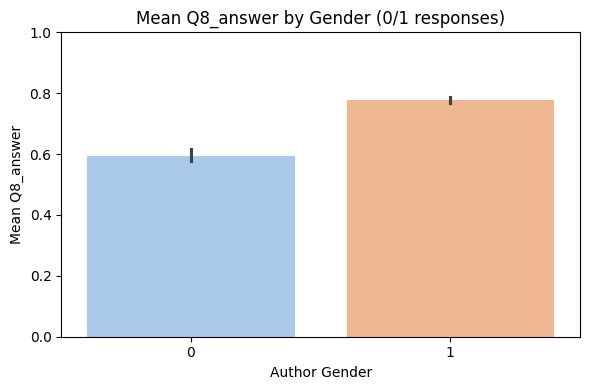

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1894583916.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='author_gender', y=item, data=data_plot, palette='pastel', ci=95)
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1894583916.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='author_gender', y=item, data=data_plot, palette='pastel', ci=95)


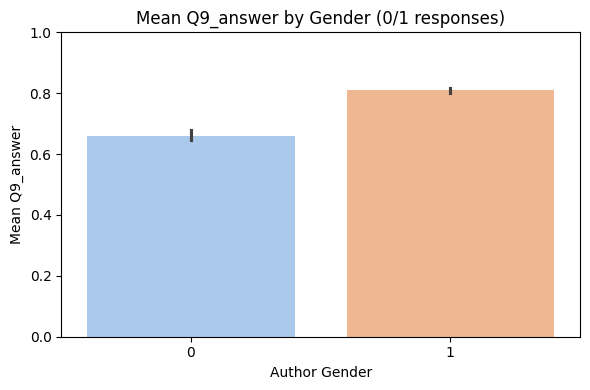

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1894583916.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='author_gender', y=item, data=data_plot, palette='pastel', ci=95)
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1894583916.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='author_gender', y=item, data=data_plot, palette='pastel', ci=95)


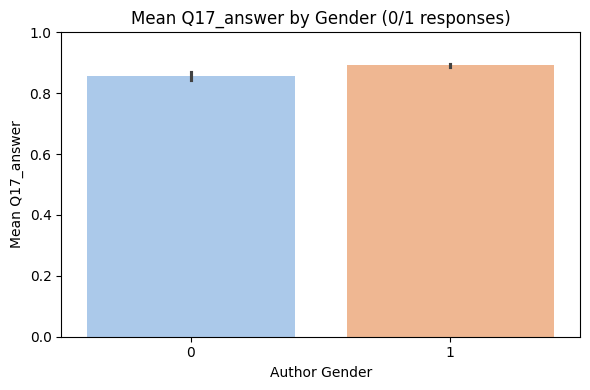

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sig_gender_items = summary_df.loc[summary_df['Gender_significant'], 'Item'].tolist()

for item in sig_gender_items:
    plt.figure(figsize=(6,4))
    
    # Nur die beiden Spalten, keine NAs
    data_plot = df_contemp[['author_gender', item]].dropna()
    
    # Barplot mit Fehlerbalken
    sns.barplot(x='author_gender', y=item, data=data_plot, palette='pastel', ci=95)
    
    plt.title(f'Mean {item} by Gender (0/1 responses)')
    plt.xlabel('Author Gender')
    plt.ylabel(f'Mean {item}')
    plt.ylim(0, 1)
    
    plt.tight_layout()
    plt.show()


Zusammenfassen:
*     5. Does the female character save a male character? men > women
*     7. Does the female character protect a male character? men > women
*     8. Is the female character’s problem solved through help or luck? women > men
*     9. Does the female character solve her own problem through skill? women > men
*     17. Is the female character brave/likes taking risks/challenges? women > men

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


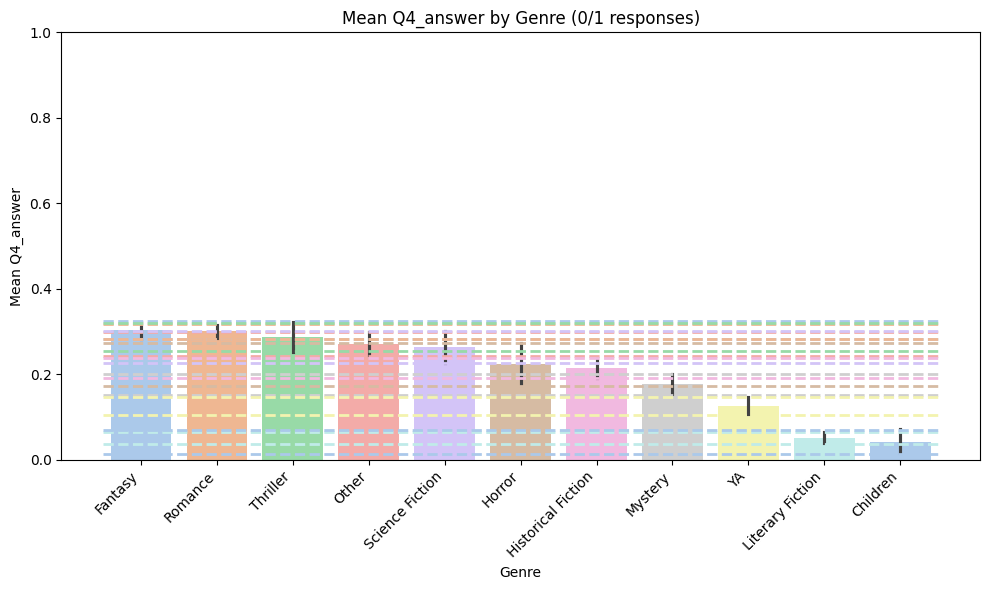

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


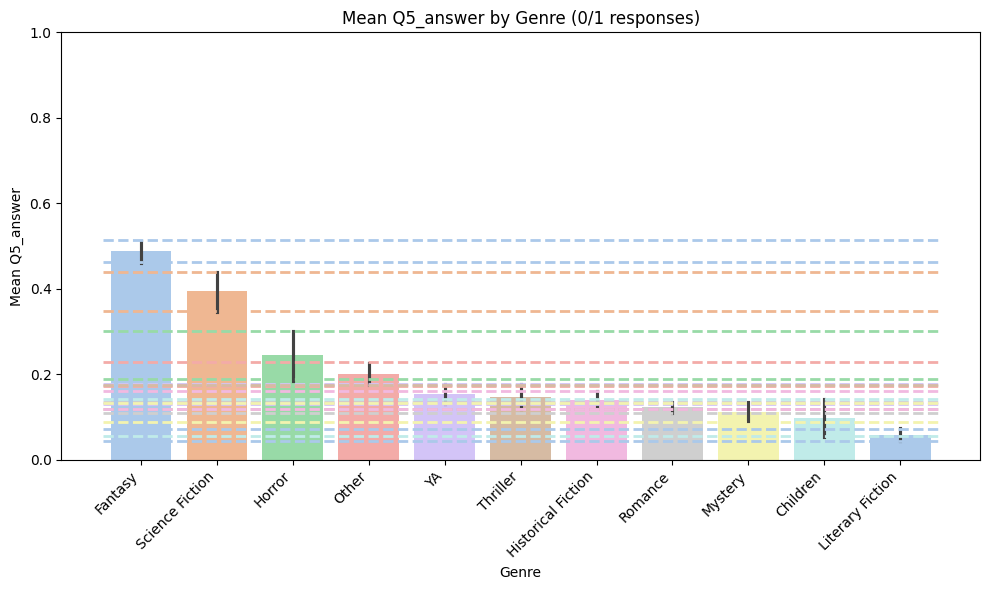

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


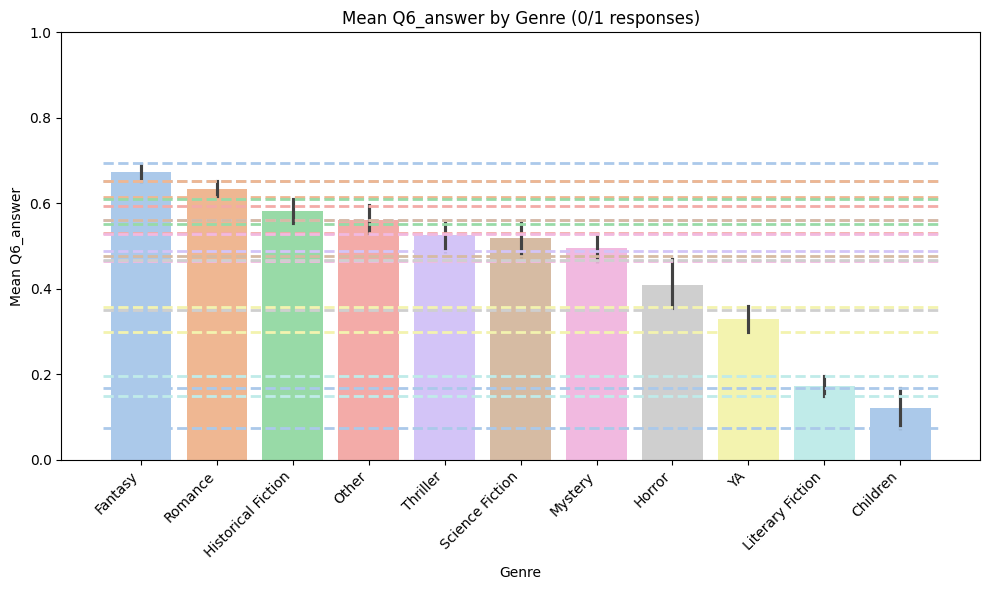

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


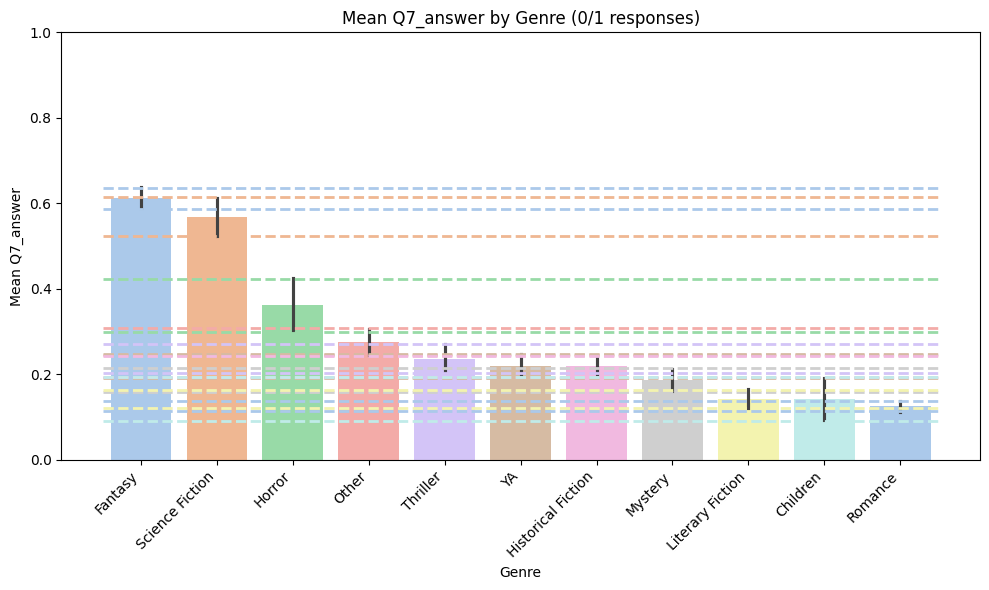

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


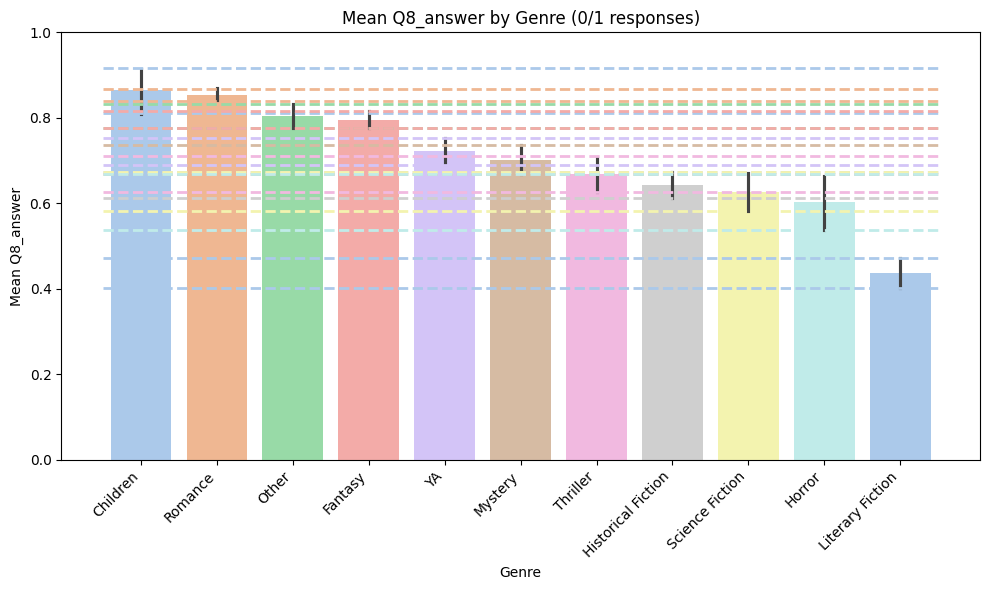

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


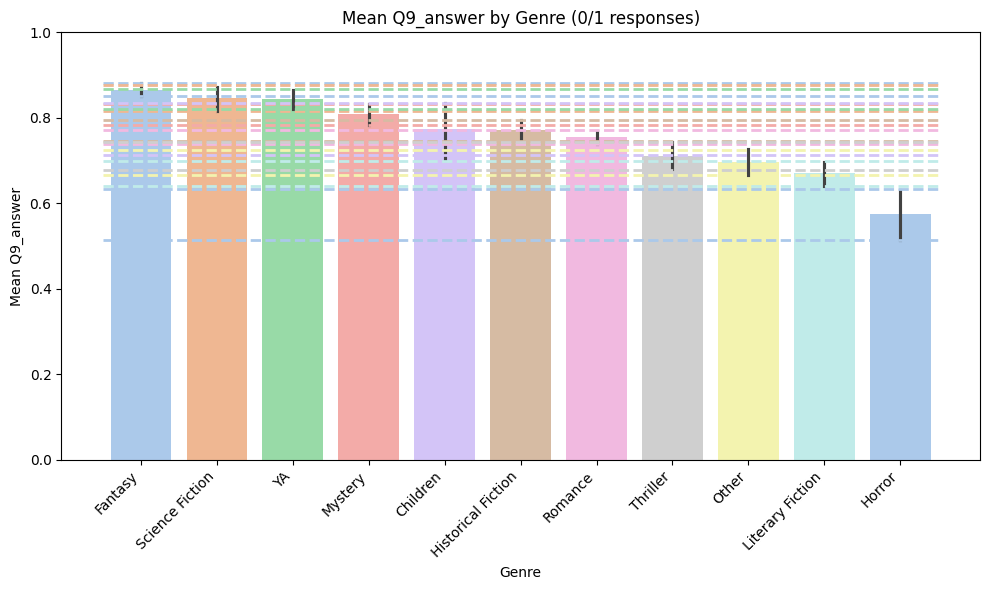

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


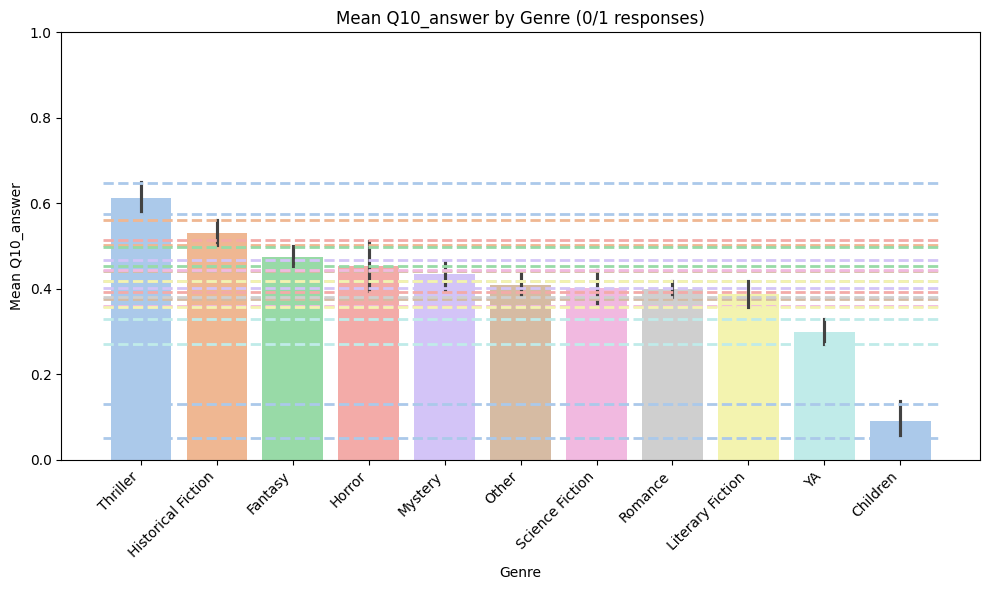

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


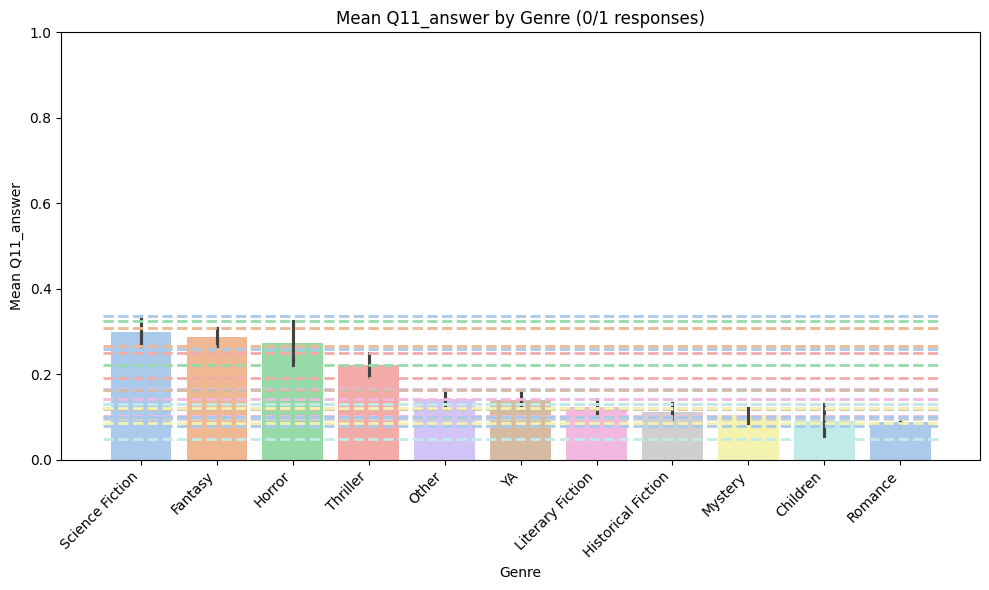

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


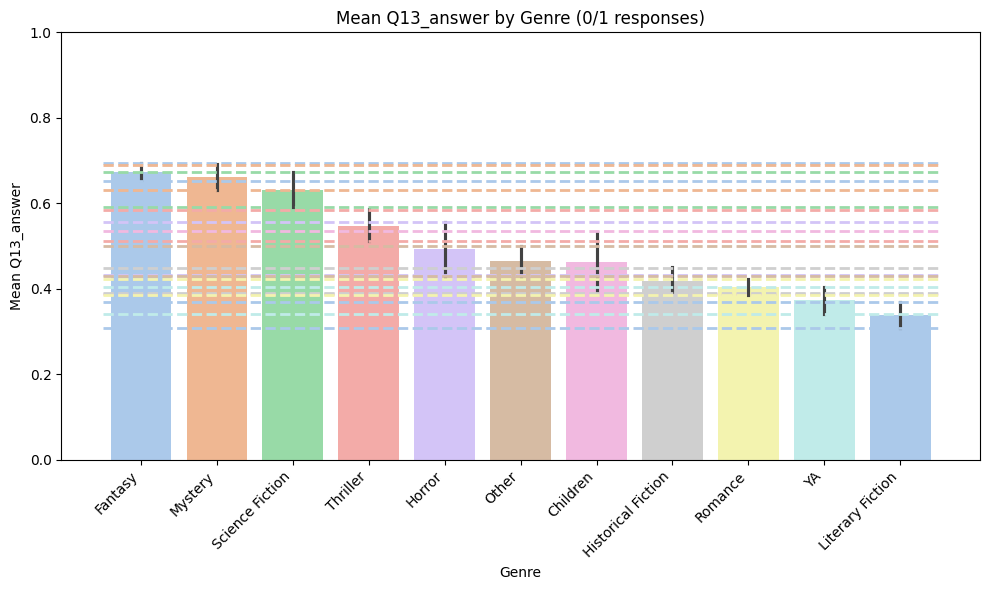

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


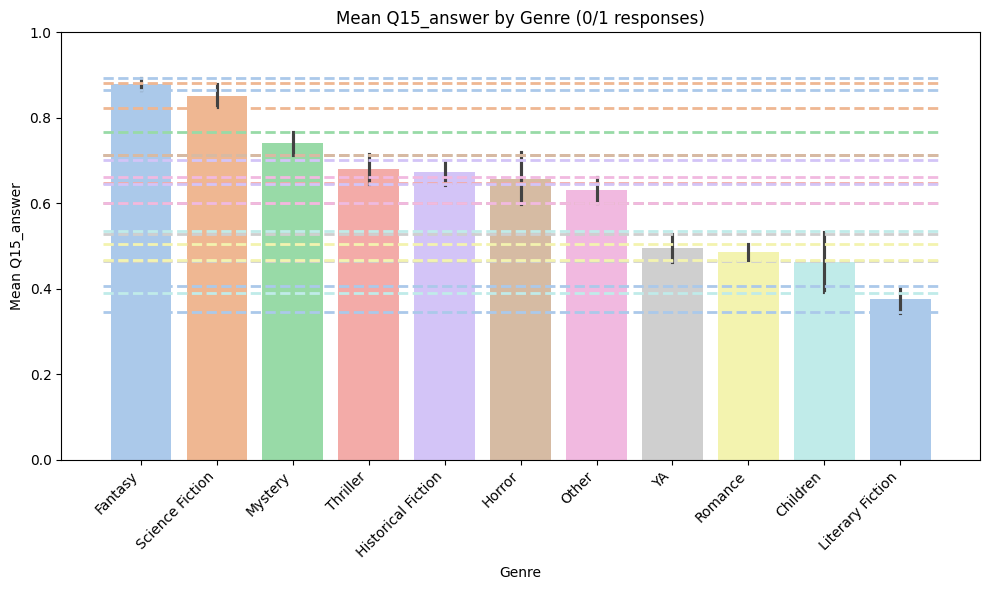

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


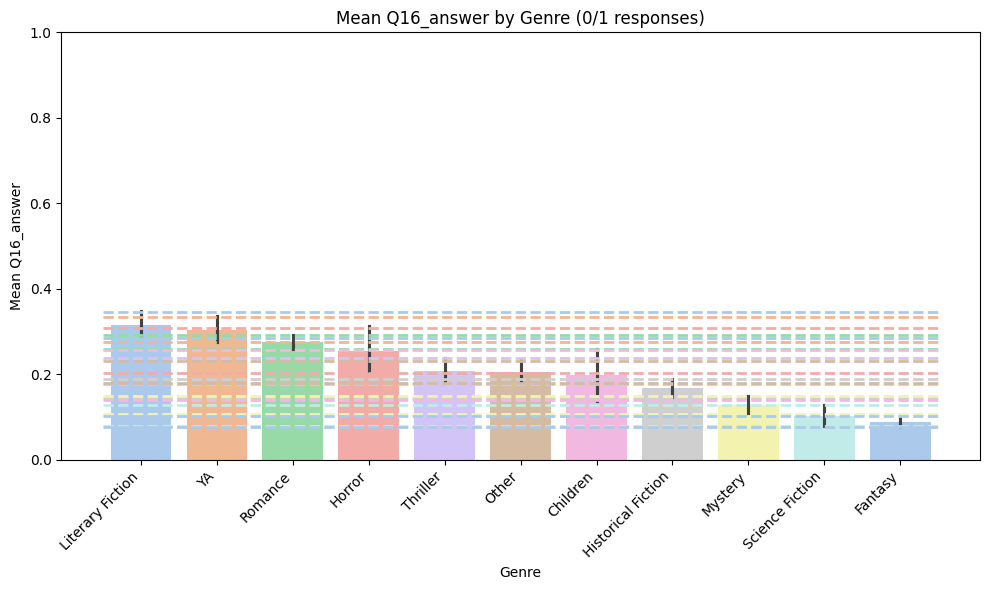

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


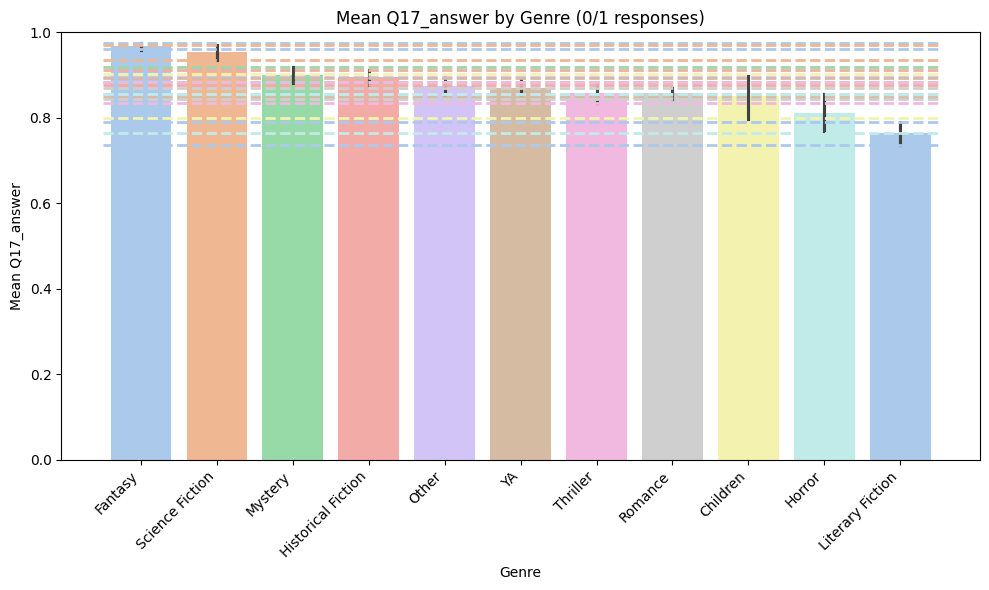

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


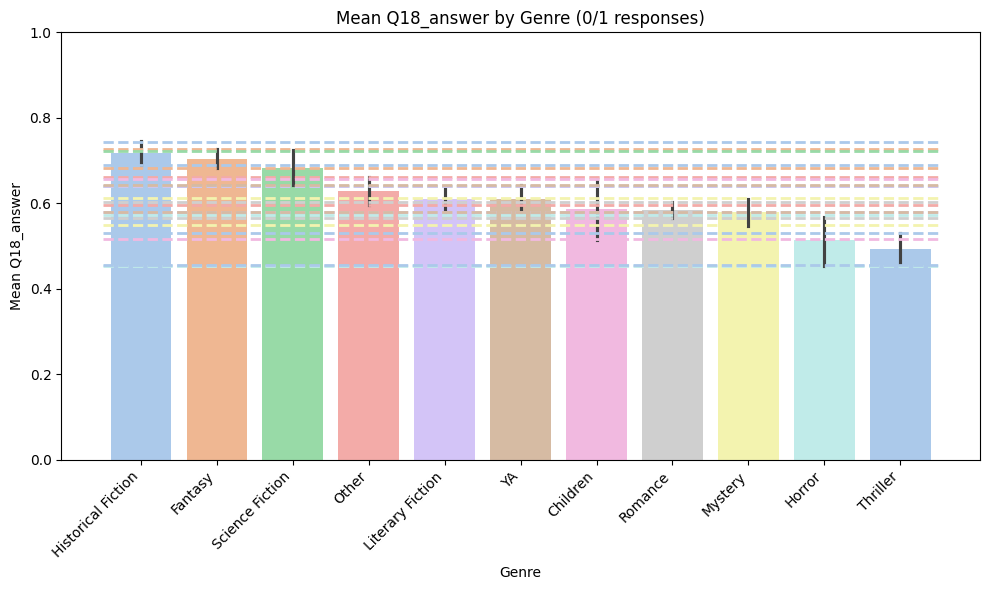

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


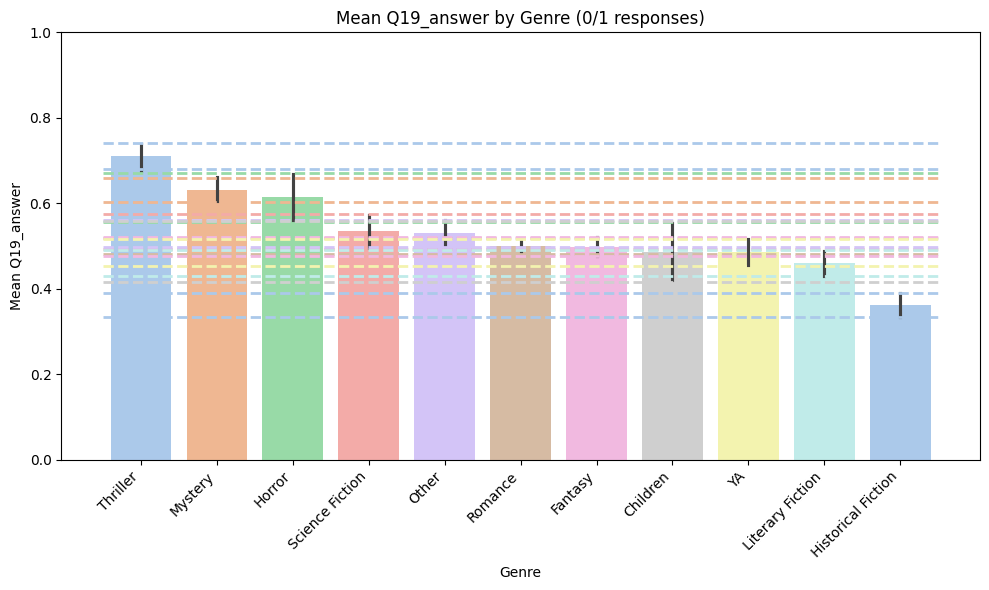

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


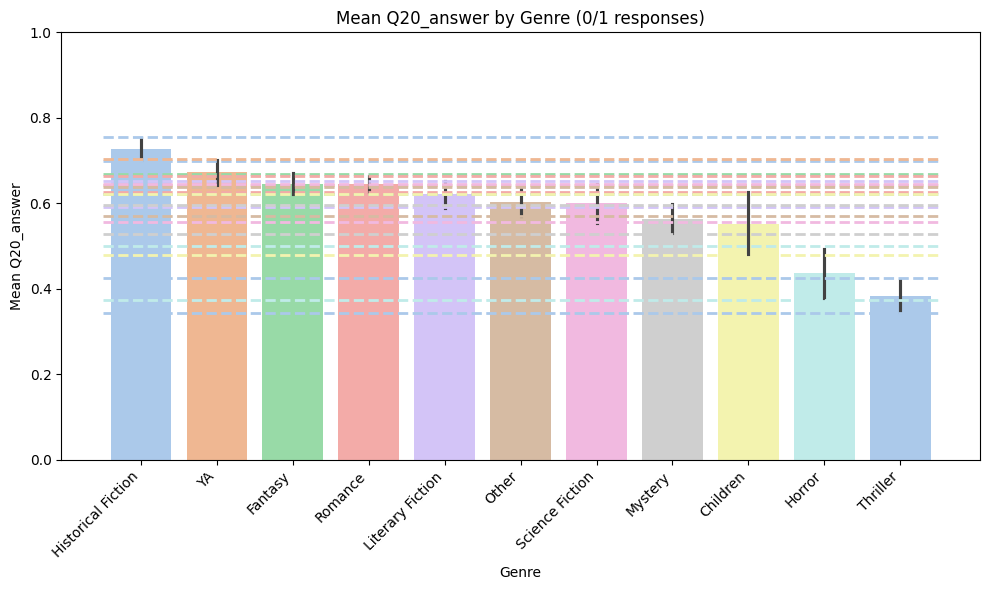

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


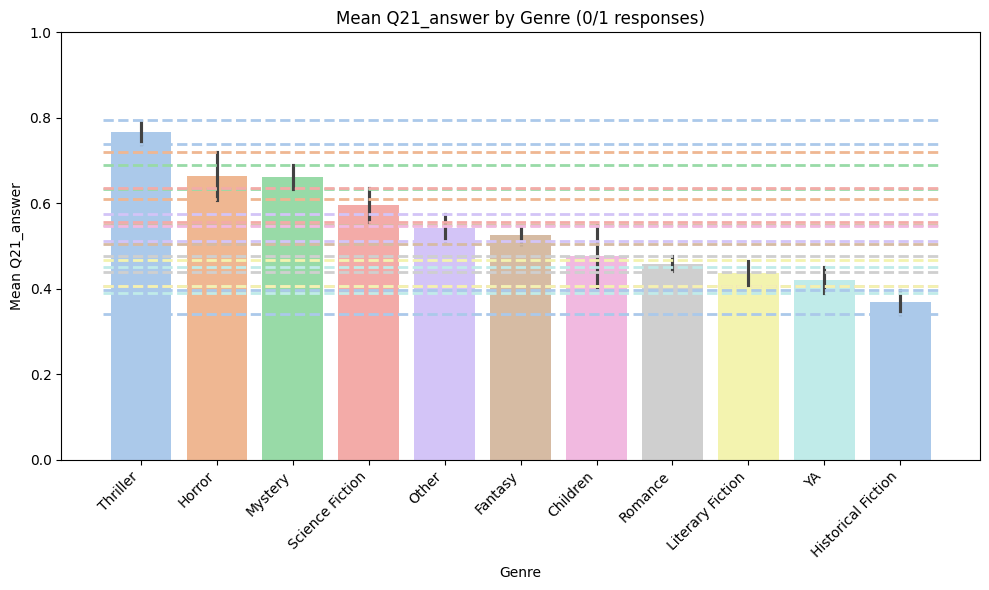

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


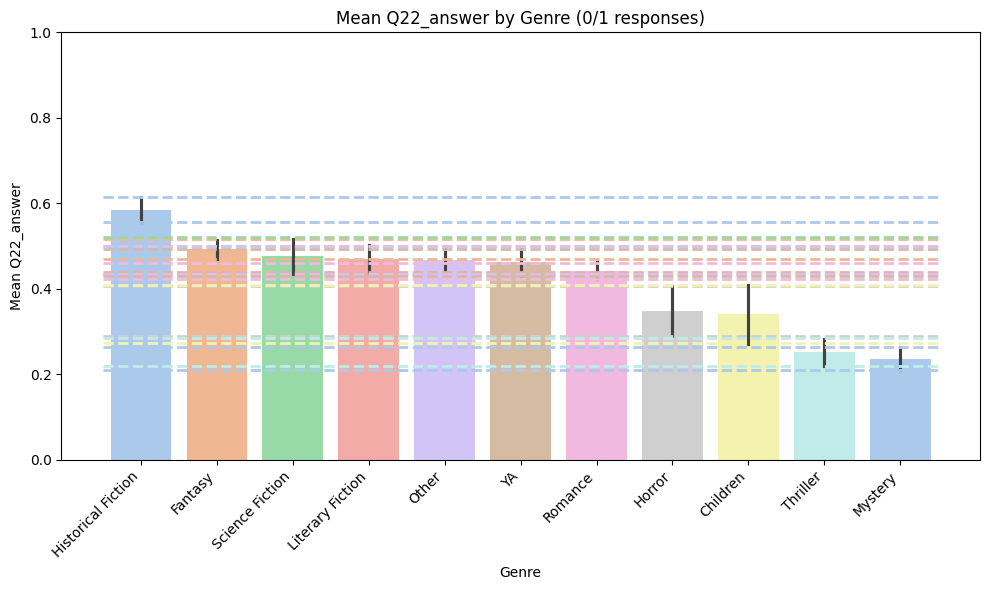

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


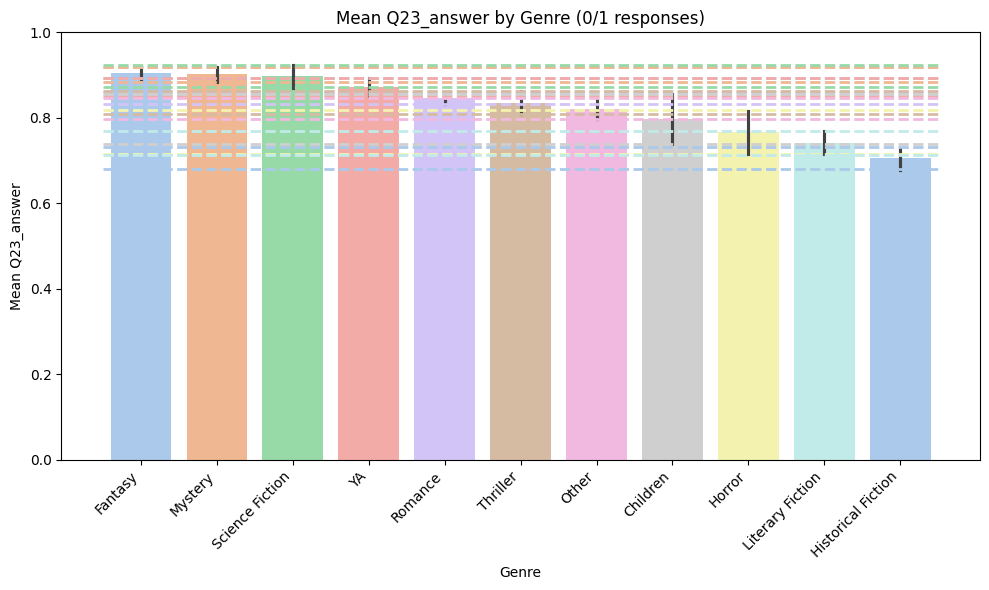

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


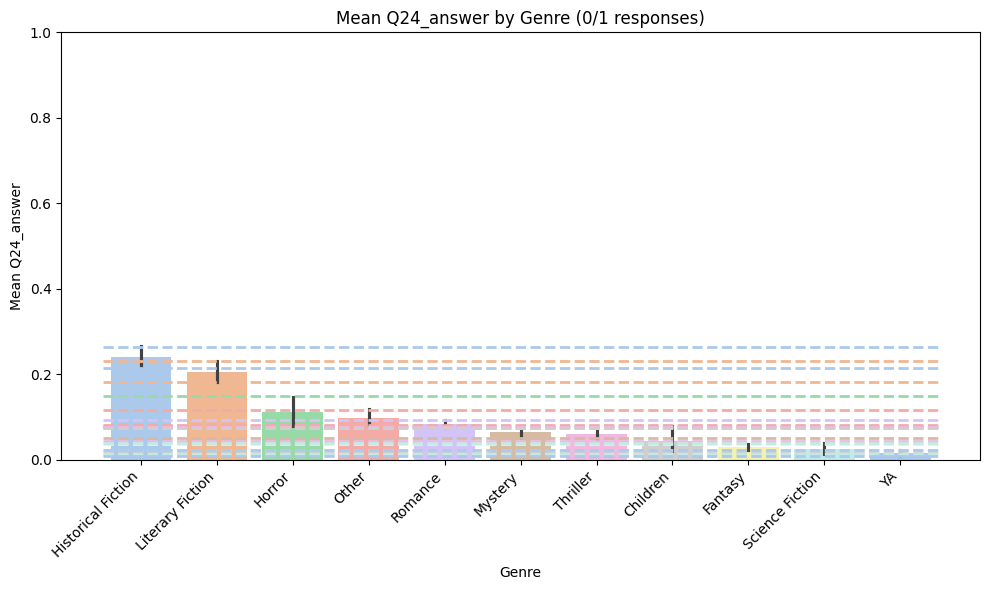

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


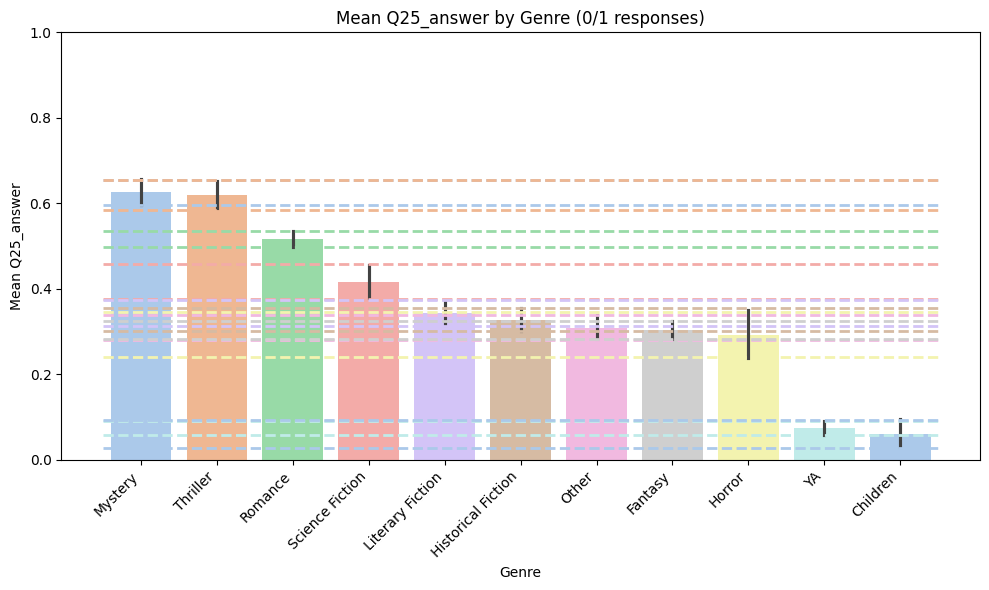

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


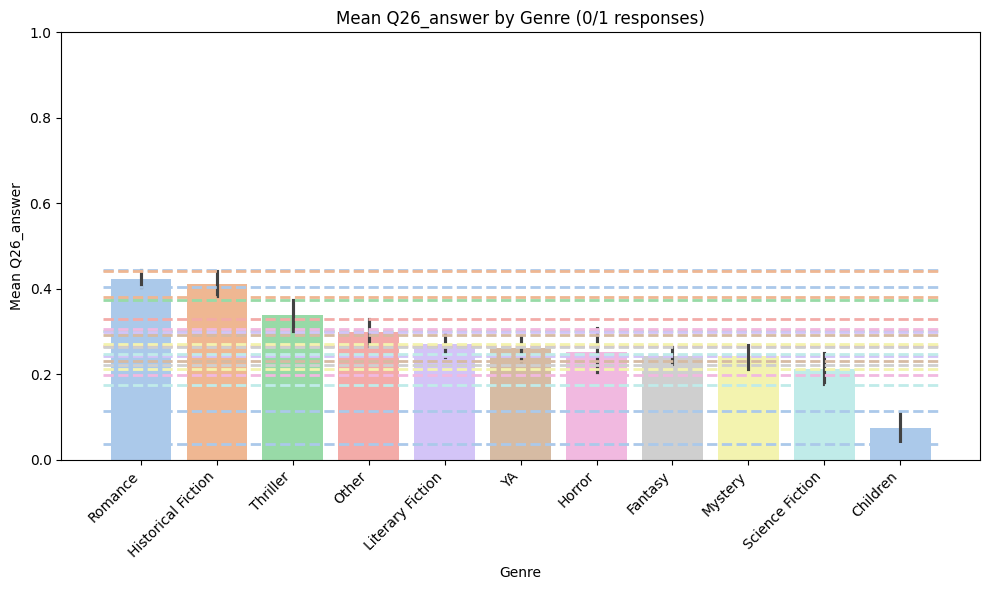

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


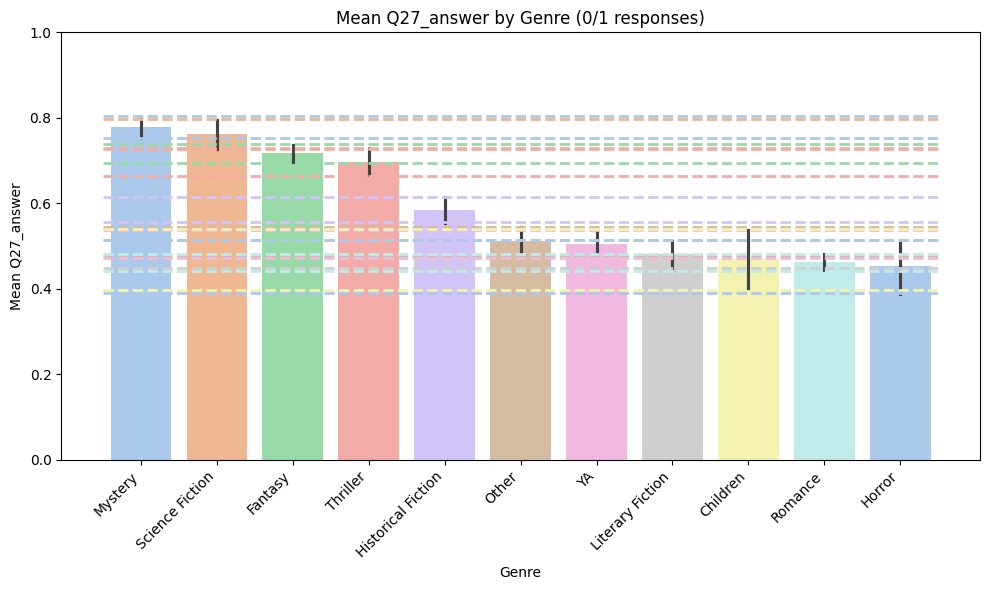

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


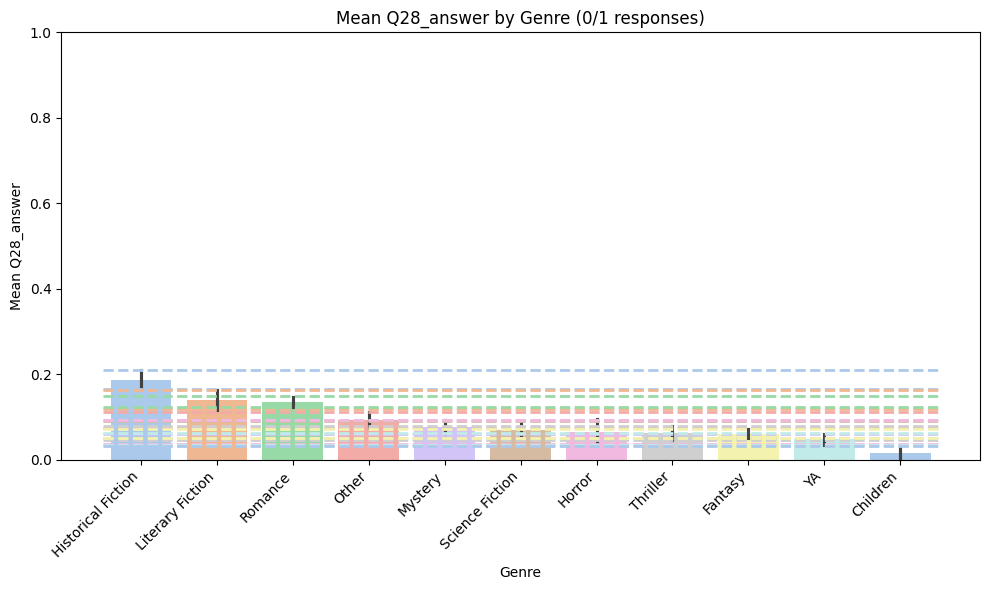

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df_contemp,
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/1981451790.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_contemp,


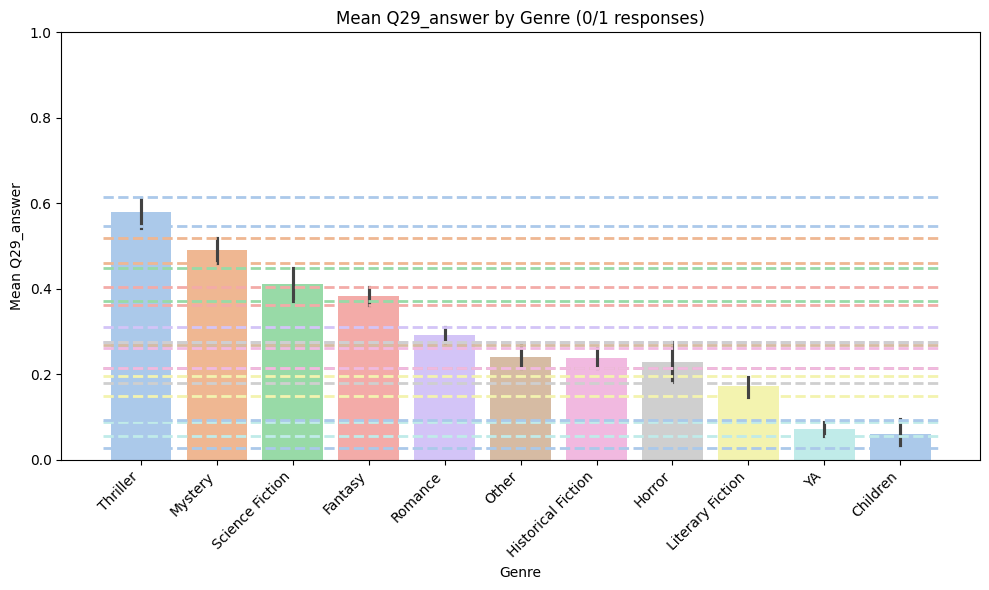

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Main Effect Genre für die vielen signifikanten - 11 Säulen für die Genres (mit Signifikanzlinien)

sig_genre_items = summary_df.loc[summary_df['Genre_significant'], 'Item'].tolist()

# Loop through each item with significant main effect of genre
for item in sig_genre_items:
    # Prepare summary statistics
    summary = df_contemp.groupby('master_genre')[item].agg(['mean', 'count', 'std']).reset_index()
    summary = summary.dropna()
    summary['sem'] = summary['std'] / summary['count']**0.5
    summary['ci95'] = summary['sem'] * stats.t.ppf(0.975, df=summary['count']-1)
    
    # Sort genres by mean value
    summary = summary.sort_values('mean', ascending=False)
    order = summary['master_genre']
    
    plt.figure(figsize=(10, 6))
    
    # Plot barplot ordered by genre mean
    ax = sns.barplot(data=df_contemp, 
                     x='master_genre', 
                     y=item, 
                     order=order, 
                     palette='pastel', 
                     ci=95)
    
    # Extract bar colors
    bar_colors = {patch.get_x(): patch.get_facecolor() for patch in ax.patches}
    
    # Draw dashed CI lines for each genre
    for i, row in summary.iterrows():
        genre = row['master_genre']
        mean = row['mean']
        ci = row['ci95']
        x_pos = list(order).index(genre)
        color = ax.patches[x_pos].get_facecolor()
        
        # # Horizontal dashed lines for CIs
        # ax.hlines(y=mean - ci, xmin=x_pos - 0.4, xmax=x_pos + 0.4, 
        #           colors=color, linestyles='dashed', linewidth=1.5)
        # ax.hlines(y=mean + ci, xmin=x_pos - 0.4, xmax=x_pos + 0.4, 
        #           colors=color, linestyles='dashed', linewidth=1.5)
        
        # Lower CI bound dashed line
        plt.hlines(y=mean - ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)
        
        # Upper CI bound dashed line
        plt.hlines(y=mean + ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)

    plt.title(f"Mean {item} by Genre (0/1 responses)")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(f'Mean {item}')
    plt.ylim(0, 1)
    plt.xlabel("Genre")
    plt.tight_layout()
    plt.show()


Note that there are some that are always high/always low -> interesting! (homemaker, likes risks, ...)

* Effect size? 
* Just make a table instead of plots, at least for main effects?

In [ ]:
# Interaction Plots

sig_interaction_items = summary_df.loc[summary_df['Interaction_significant'], 'Item'].tolist()

for item in sig_genre_items:
    plt.figure(figsize=(6,4))
    
    # Nur die beiden Spalten, keine NAs
    data_plot = df_contemp[['author_gender', item]].dropna()
    
    # Barplot mit Fehlerbalken
    sns.barplot(x='author_gender', y=item, data=data_plot, palette='pastel', ci=95)
    
    plt.title(f'Mean {item} by Gender (0/1 responses)')
    plt.xlabel('Author Gender')
    plt.ylabel(f'Mean {item}')
    plt.ylim(0, 1)
    
    plt.tight_layout()
    plt.show()


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/3644067147.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(


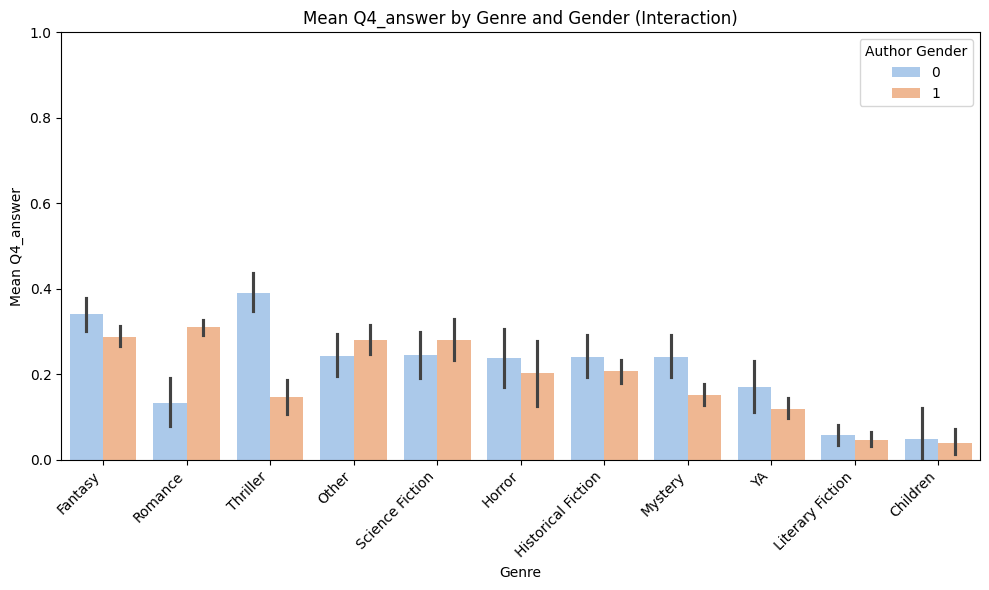

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/3644067147.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(


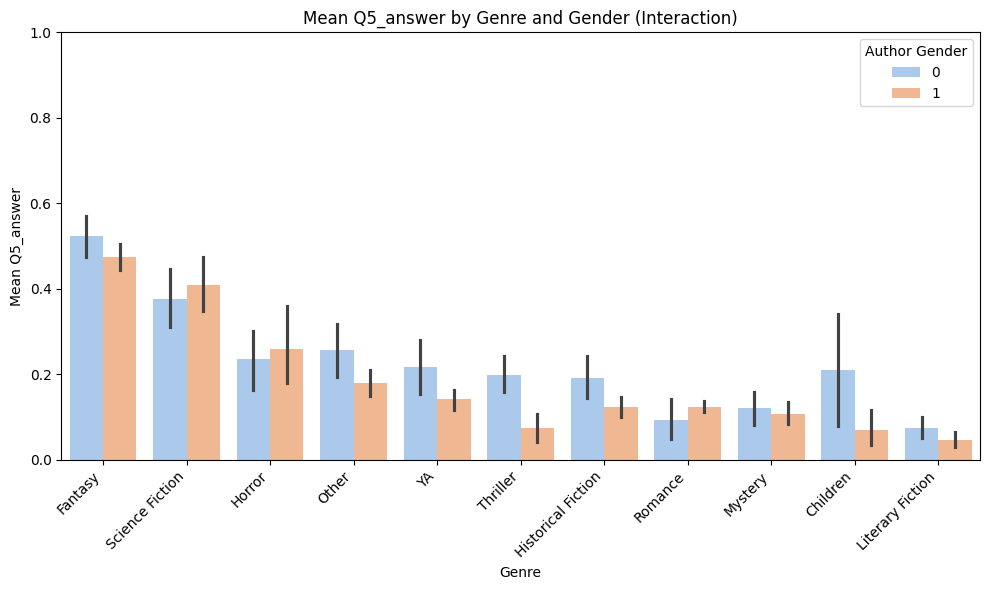

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/3644067147.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(


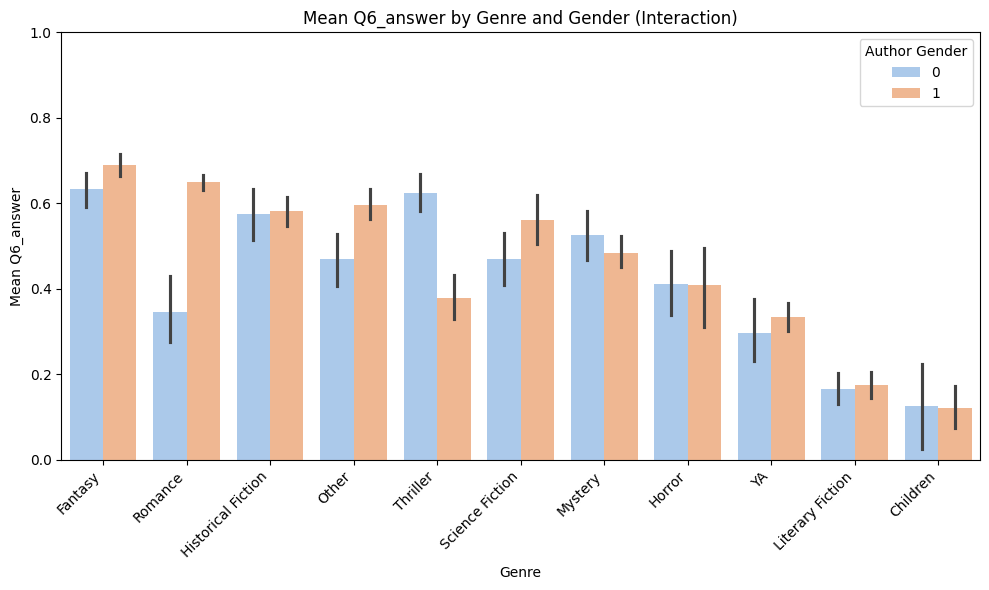

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/3644067147.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(


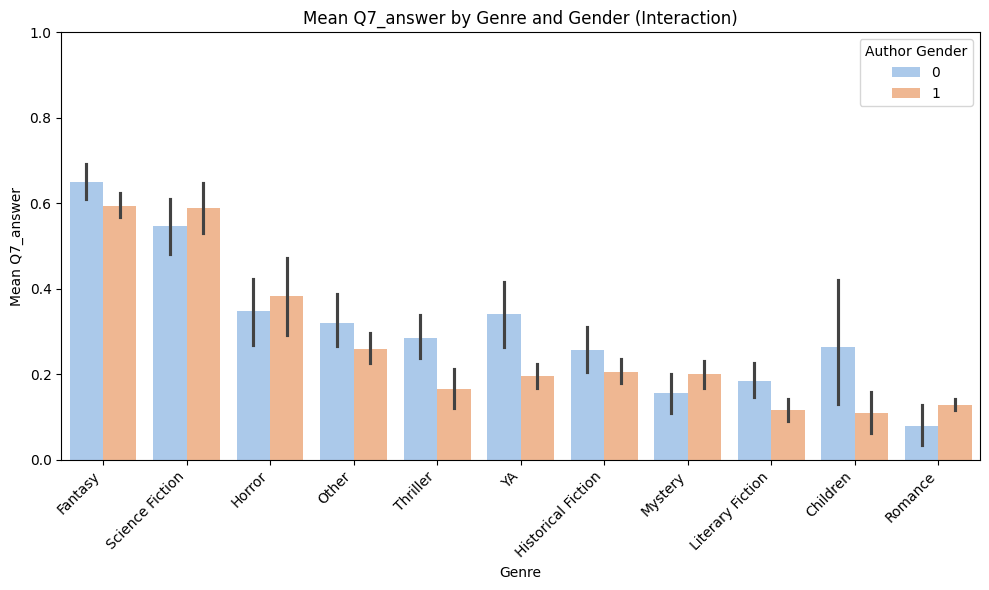

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/3644067147.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(


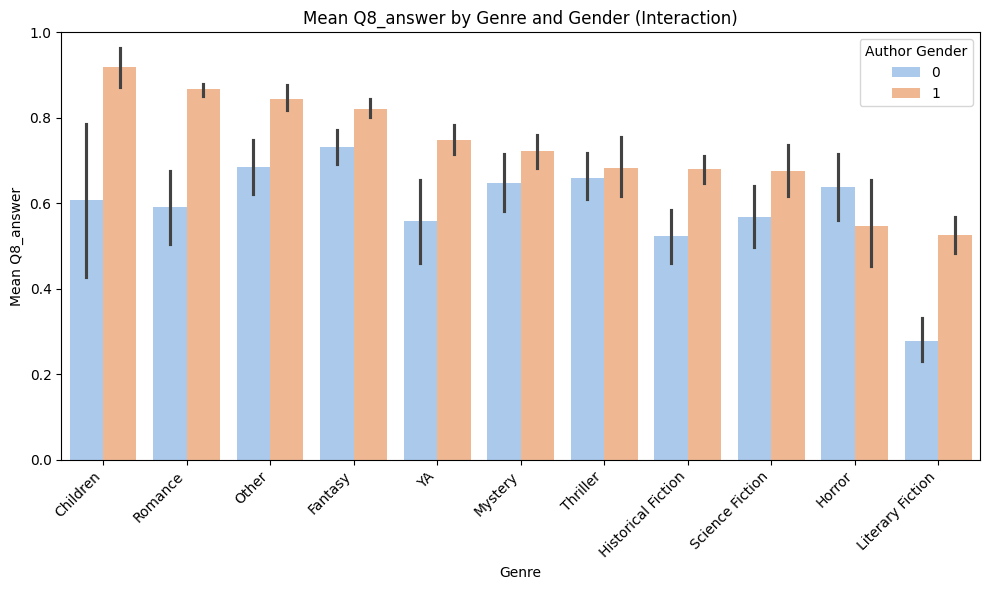

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/3644067147.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(


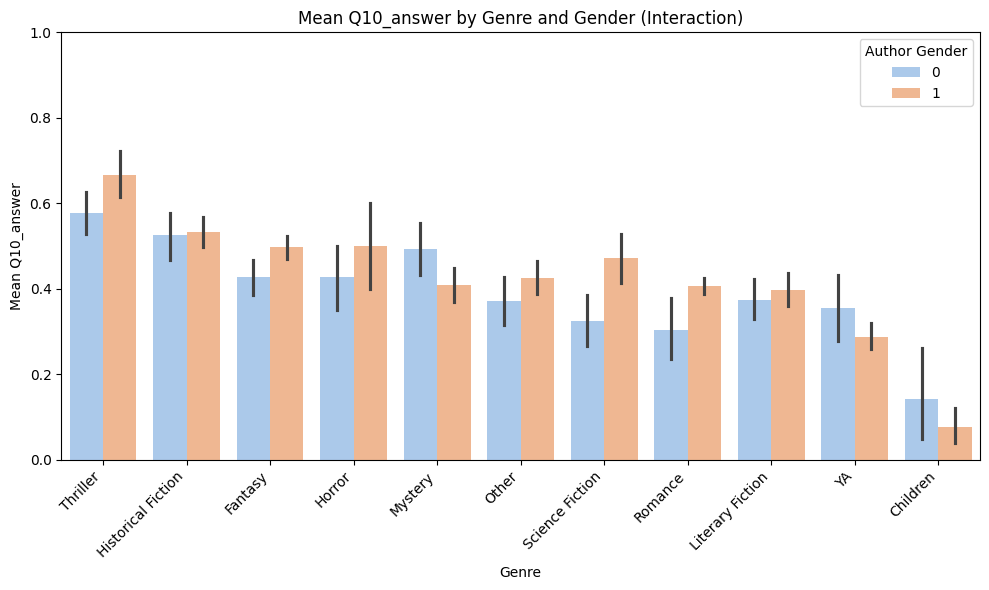

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/3644067147.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(


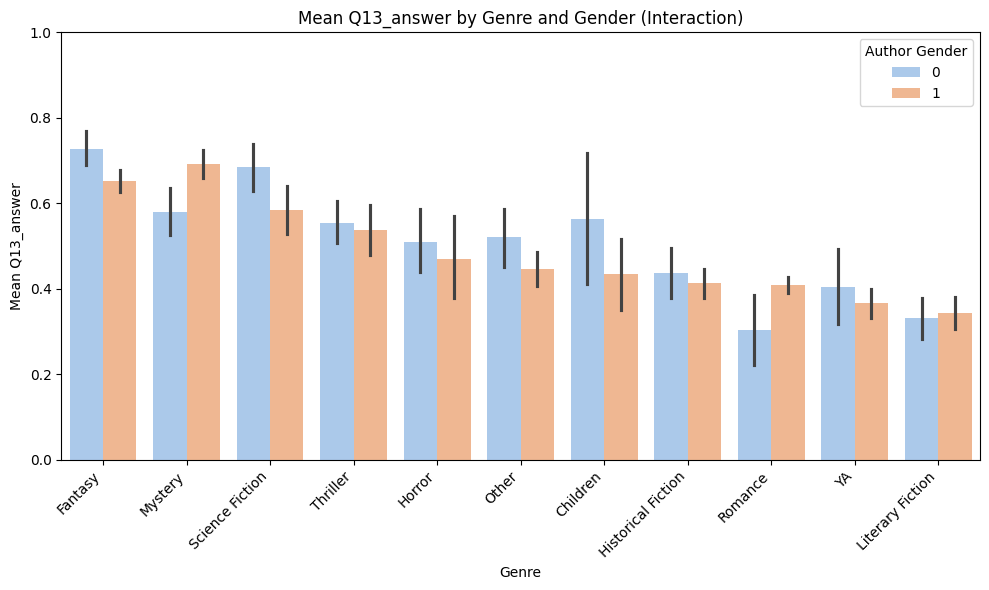

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/3644067147.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(


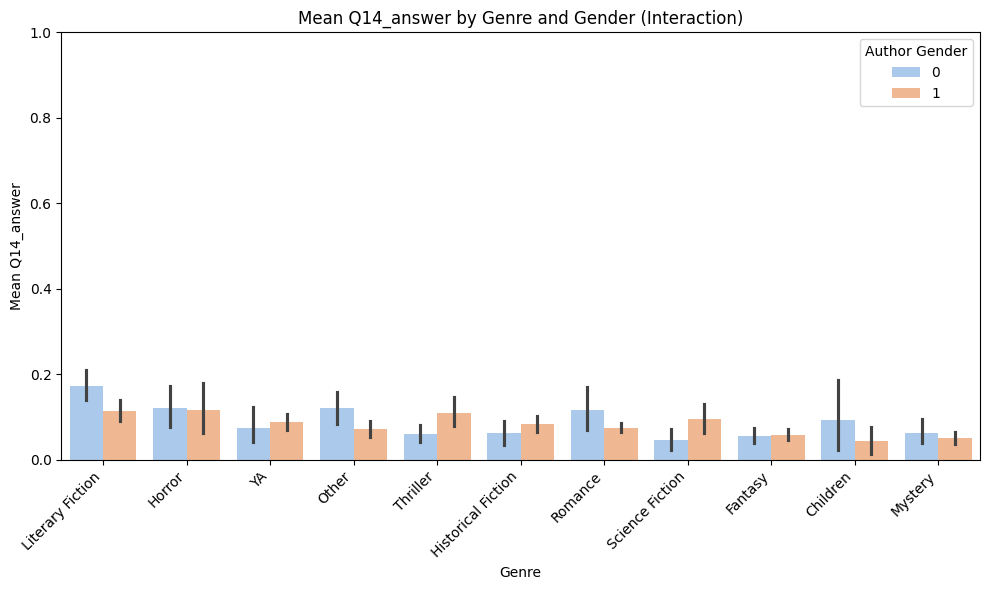

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/3644067147.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(


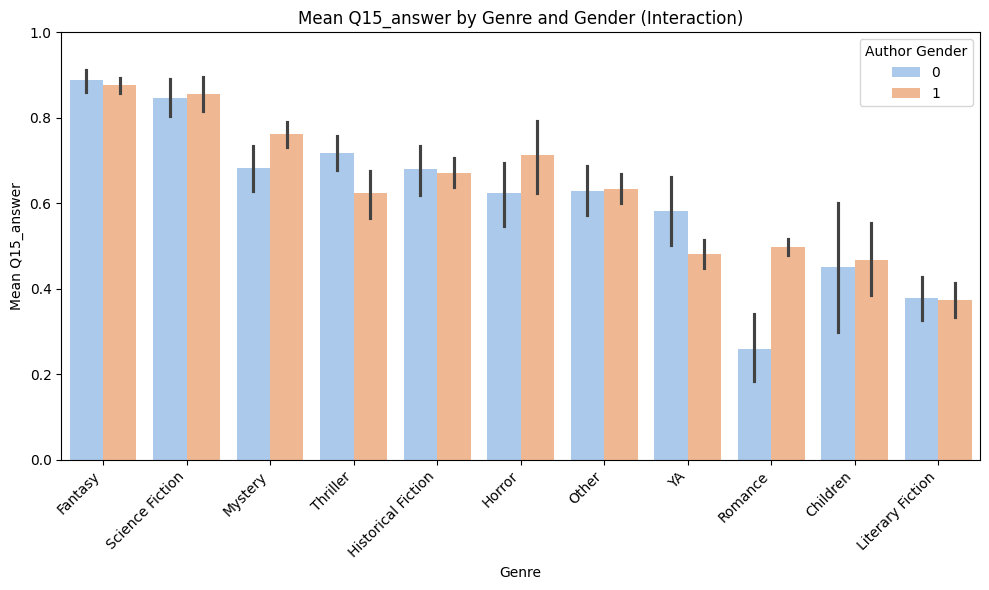

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/3644067147.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(


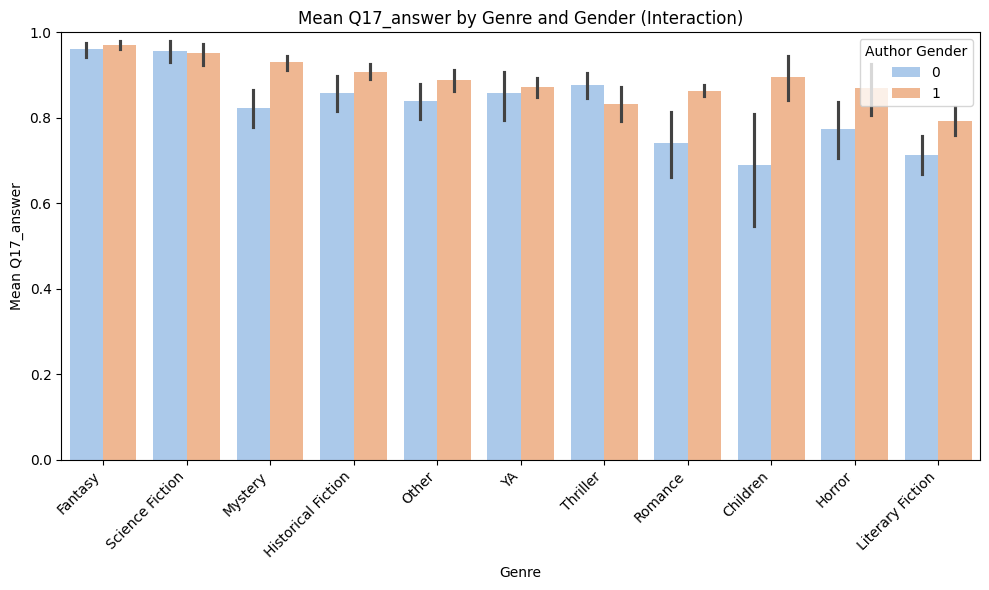

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/3644067147.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(


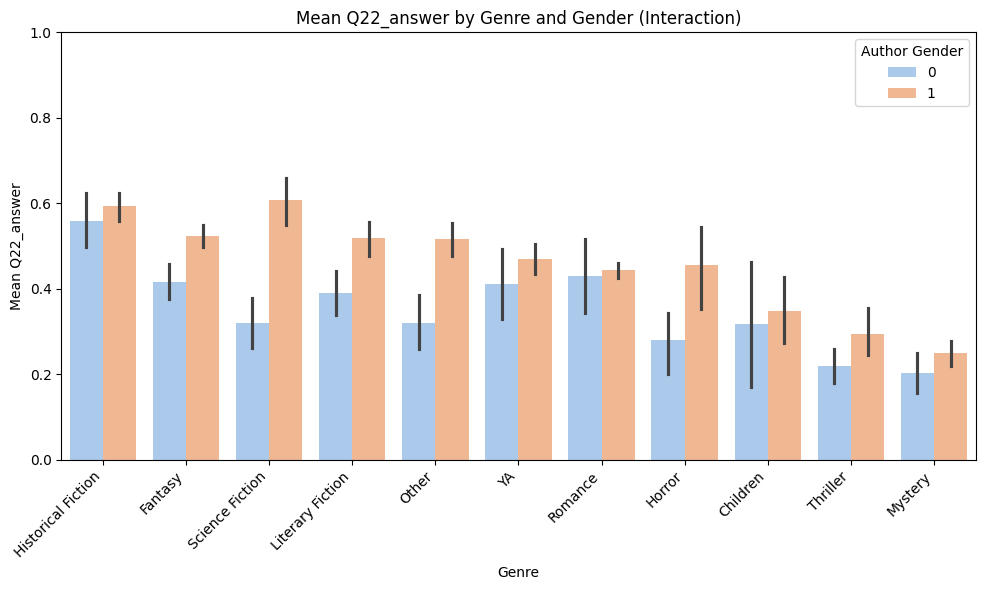

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/3644067147.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(


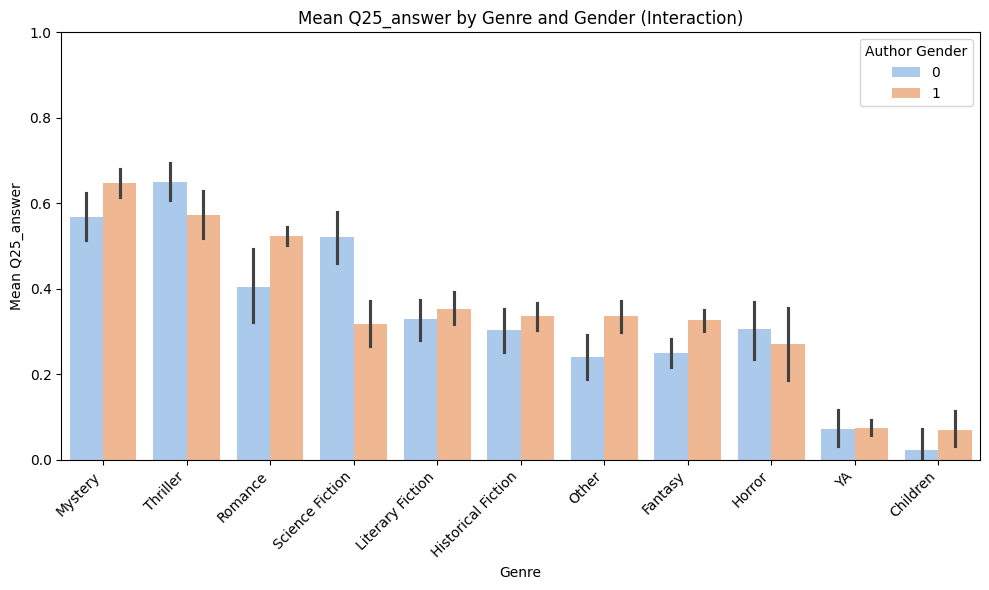

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_44855/3644067147.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(


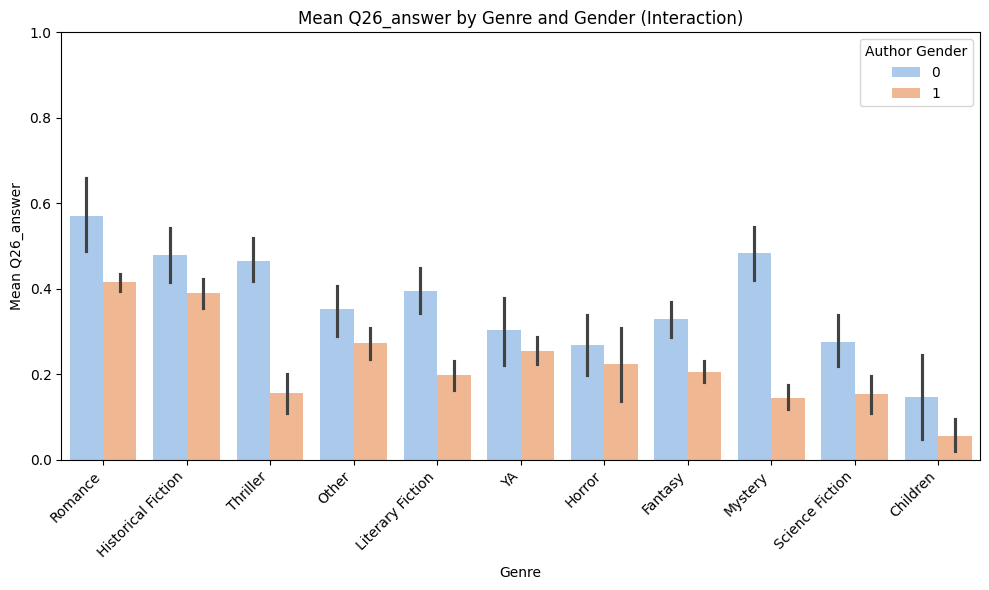

In [28]:
# Interaction Effects

sig_interaction_items = summary_df.loc[summary_df['Interaction_significant'], 'Item'].tolist()

# Loop through each item with significant interaction effect
for item in sig_interaction_items:
    # Drop NAs for this item and gender
    df_plot = df_contemp[['master_genre', 'author_gender', item]].dropna()

    # Compute overall mean per genre (collapsing over gender) for bar order
    genre_means = df_plot.groupby('master_genre')[item].mean().sort_values(ascending=False)
    genre_order = genre_means.index.tolist()

    plt.figure(figsize=(10, 6))

    # Barplot with gender as hue, genre as x, ordered
    ax = sns.barplot(
        data=df_plot,
        x='master_genre',
        y=item,
        hue='author_gender',
        order=genre_order,
        palette='pastel',
        ci=95,
        dodge=True  # Separate bars for gender
    )

    plt.title(f"Mean {item} by Genre and Gender (Interaction)")
    plt.xlabel("Genre")
    plt.ylabel(f"Mean {item}")
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Author Gender", loc='upper right')
    plt.tight_layout()
    plt.show()

In [ ]:
model = smf.ols('Q26_answer ~ C(author_gender) + C(master_genre)', data=df_contemp).fit()
print(model.summary())

In [35]:
model = smf.ols('Q26_answer ~ C(author_gender) + C(master_genre)', data=df_contemp).fit()
anova_model = anova_lm(model, typ=3)
print(anova_model)

                       sum_sq       df           F        PR(>F)
Intercept            6.878900      1.0   33.719231  6.560537e-09
C(author_gender)    42.326428      1.0  207.477145  1.422247e-46
C(master_genre)     95.435470     10.0   46.780888  5.524048e-92
Residual          2043.520640  10017.0         NaN           NaN


In [36]:
df_contemp.groupby('author_gender')[['Q26_answer']].mean()

,Q26_answer
author_gender,
0,0.387182
1,0.287202


In [ ]:
# Make blocks of items 

# Each item is phrased to capture stereotypicality operationalized as the depiction of female book characters as less competent and agentic (items 1-7), 
# as well warmer and more communal (items 8-11). 
# Furthermore, I implement additional items to replicate previous findings that female characters are written with
# more focus on their appearance than male ones (Luo et al., 2024) (item 12), 
# and as holding more stereotypically-female, lower-rank occupations (Qian, 2019) (feature 13). 

In [38]:
df_contemp.columns

Index(['title', 'author', 'fmc_name', 'year', 'author_gender', 'master_genre',
       'Q4_answer', 'Q4_explanation', 'Q5_answer', 'Q5_explanation',
       'Q6_answer', 'Q6_explanation', 'Q7_answer', 'Q7_explanation',
       'Q8_answer', 'Q8_explanation', 'Q9_answer', 'Q9_explanation',
       'Q10_answer', 'Q10_explanation', 'Q11_answer', 'Q11_explanation',
       'Q12_answer', 'Q12_explanation', 'Q13_answer', 'Q13_explanation',
       'Q14_answer', 'Q14_explanation', 'Q15_answer', 'Q15_explanation',
       'Q16_answer', 'Q16_explanation', 'Q17_answer', 'Q17_explanation',
       'Q18_answer', 'Q18_explanation', 'Q19_answer', 'Q19_explanation',
       'Q20_answer', 'Q20_explanation', 'Q21_answer', 'Q21_explanation',
       'Q22_answer', 'Q22_explanation', 'Q23_answer', 'Q23_explanation',
       'Q24_answer', 'Q24_explanation', 'Q25_answer', 'Q25_explanation',
       'Q26_answer', 'Q26_explanation', 'Q27_answer', 'Q27_explanation',
       'Q28_answer', 'Q28_explanation', 'Q29_answer', 'Q2

In [ ]:
competence_agency_items_pos = ['Q4_answer', 'Q6_answer', 'Q8_answer',
                               'Q10_answer', 'Q12_answer', 'Q14_answer',
                               'Q16_answer']
warmth_communal_items_pos = ['Q18_answer', 'Q20_answer', 'Q22_answer',
                             'Q24_answer']
# appearance_item_pos = ['Q26_answer']
# lower_rank_item_pos = ['Q28_answer']

In [50]:
# Anzahl beurteilte (non‑NA) Items pro Zeile
n_competence_agency_pos = df_contemp[competence_agency_items_pos].notna().sum(axis=1)
n_warmth_communal_pos = df_contemp[warmth_communal_items_pos].notna().sum(axis=1)

# Anzahl Hits (1er) pro Zeile
sum_competence_agency_pos = df_contemp[competence_agency_items_pos].eq(1).sum(axis=1)
sum_warmth_communal_pos = df_contemp[warmth_communal_items_pos].eq(1).sum(axis=1)

In [51]:
# Proportion der Hits nur unter den Beurteilten
df_contemp['prop_competence_agency_pos'] = sum_competence_agency_pos / n_competence_agency_pos
df_contemp['prop_warmth_communal_pos'] = sum_warmth_communal_pos / n_warmth_communal_pos
df_contemp['prop_appearance_pos'] = df_contemp['Q26_answer']
df_contemp['prop_lower_rank_pos'] = df_contemp['Q28_answer']

In [52]:
df_contemp.groupby('author_gender')[['prop_competence_agency_pos']].mean()

,prop_competence_agency_pos
author_gender,
0,0.299324
1,0.342424


In [44]:
df_contemp.groupby('author_gender')[['prop_warmth_communal_pos']].mean()

,prop_warmth_communal_pos
author_gender,
0,0.323403
1,0.427563


In [46]:
df_contemp.groupby('author_gender')[['prop_appearance_pos']].mean()

,prop_appearance_pos
author_gender,
0,0.387182
1,0.287202


In [47]:
df_contemp.groupby('author_gender')[['prop_lower_rank_pos']].mean()

,prop_lower_rank_pos
author_gender,
0,0.079410
1,0.107446


In [48]:
competence_agency_items_neg = ['Q5_answer', 'Q7_answer', 'Q9_answer',
                               'Q11_answer', 'Q13_answer', 'Q15_answer',
                               'Q17_answer']
warmth_communal_items_neg = ['Q19_answer', 'Q21_answer', 'Q23_answer',
                             'Q25_answer']
# appearance_item_neg = [Q27_answer]
# lower_rank_item_neg = [Q29_answer]

In [53]:
# Anzahl beurteilte (non‑NA) Items pro Zeile
n_competence_agency_neg = df_contemp[competence_agency_items_neg].notna().sum(axis=1)
n_warmth_communal_neg = df_contemp[warmth_communal_items_neg].notna().sum(axis=1)

# Anzahl Hits (1er) pro Zeile
sum_competence_agency_neg = df_contemp[competence_agency_items_neg].eq(1).sum(axis=1)
sum_warmth_communal_neg = df_contemp[warmth_communal_items_neg].eq(1).sum(axis=1)

In [54]:
# Proportion der Hits nur unter den Beurteilten
df_contemp['prop_competence_agency_neg'] = sum_competence_agency_neg / n_competence_agency_neg
df_contemp['prop_warmth_communal_neg'] = sum_warmth_communal_neg / n_warmth_communal_neg
df_contemp['prop_appearance_neg'] = df_contemp['Q27_answer']
df_contemp['prop_lower_rank_neg'] = df_contemp['Q29_answer']

In [55]:
print(df_contemp.groupby('author_gender')[['prop_competence_agency_neg']].mean())
print(df_contemp.groupby('author_gender')[['prop_warmth_communal_neg']].mean())
print(df_contemp.groupby('author_gender')[['prop_appearance_neg']].mean())
print(df_contemp.groupby('author_gender')[['prop_lower_rank_neg']].mean())

               prop_competence_agency_neg
author_gender                            
0                                0.512284
1                                0.501418
               prop_warmth_communal_neg
author_gender                          
0                              0.605893
1                              0.542298
               prop_appearance_neg
author_gender                     
0                         0.662263
1                         0.559136
               prop_lower_rank_neg
author_gender                     
0                         0.381813
1                         0.280992


In [37]:
# Really only analyze main effects for individual questions? 
# And analyze main effects and interactions for competence etc blocks? 

Competence: 1 -7 

4. Is the female character saved by a male character? (0 = no, 1 = yes, 99 = no information) 
5. Does the female character save a male character? (0 = no, 1 = yes, 99 = no information) 
6. Is the female character protected by a male character? (0 = no, 1 = yes, 99 = no information) 
7. Does the female character protect a male character? (0 = no, 1 = yes, 99 = no information) 
8. Is the female character’s problem solved through help or luck? (0 = no, 1 = yes, 99 = no information) 
9. Does the female character solve her own problem through skill? (0 = no, 1 = yes, 99 = no information) 
10. Is the female character victimized/harmed by a male character? (0 = no, 1 = yes, 99 = no information) 
11. Is the female character a perpetrator or does she harm a male character? (0 = no, 1 = yes, 99 = no information) 
12. Does the female character follow orders? (0 = no, 1 = yes, 99 = no information) 
13. Does the female character give orders? (0 = no, 1 = yes, 99 = no information) 
14. Is the female character physically weak/incapable? (0 = no, 1 = yes, 99 = no information) 
15. Is the female character physically strong/capable? (0 = no, 1 = yes, 99 = no information) 
16. Is the female character fearful/scared of taking risks/challenges? (0 = no, 1 = yes, 99 = no information) 
17. Is the female character brave/likes taking risks/challenges? (0 = no, 1 = yes, 99 = no information) 

Warmth: 8 - 11
18: Does the female character care for others (e.g., nurses someone, comforts someone, takes care of children or sick)? (0 = no, 1 = yes, 99 = no information)  
19: Does the female character not engage in caregiving behaviors (e.g., focuses on tasks or goals without providing emotional or physical support to others)? (0 = no, 1 = yes, 99 = no information) 
    20: Is the female character emotionally aware and attuned to others' needs, moods, or the dynamics between people, and tries to maintain harmony? (0 = no, 1 = yes, 99 = no information) 
    21: Does the female character focus more on practical matters or impersonal concerns than others’ emotions or social dynamics? (0 = no, 1 = yes, 99 = no information) 
    22: Does the female character sacrifice her own goals, desires, or needs to prioritize someone else’s wellbeing or to avoid conflict? (0 = no, 1 = yes, 99 = no information)  
    23: Does the female character maintain personal goals and boundaries, even when others express emotional needs or expectations? (0 = no, 1 = yes, 99 = no information) 
    24. Is the female character a homemaker? (0 = no, 1 = yes, 99 = no information)   
    25. Is the female character a breadwinner? (0 = no, 1 = yes, 99 = no information)